In [44]:
destination_path = 'E:/BD_Class/project/전월세'
df_rent = pd.read_csv(destination_path+'/확인용.csv',encoding='euc-kr')

C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
df_rent = df_rent.iloc[:,1:]
df_rent['년월'] = df_rent['년'].apply(lambda x : str(x)) + df_rent['월'].apply(lambda x : str(x).zfill(2))

In [46]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3519876 entries, 0 to 3519875
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   건축년도    float64
 1   계약면적    float64
 2   년       int64  
 3   법정동     object 
 4   보증금액    object 
 5   월       int64  
 6   월세금액    object 
 7   일       int64  
 8   지역코드    int64  
 9   법정구     object 
 10  년월      object 
dtypes: float64(2), int64(4), object(5)
memory usage: 295.4+ MB


In [47]:
l = ['보증금액','월세금액']
for ele in l:
    df_rent[ele] = df_rent[ele].str.replace(',','')
    df_rent[ele] = df_rent[ele].astype(float)

In [48]:
df_rent['평당보증금액'] = round(df_rent['보증금액'] / df_rent['계약면적'],1)
df_rent['평당월세금액'] = round(df_rent['월세금액'] / df_rent['계약면적'],1)


In [49]:
df_rent['보증금액'] = df_rent['보증금액'].fillna(0)
df_rent['월세금액'] = df_rent['월세금액'].fillna(0)

df_rent['평당보증금액'] = df_rent['평당보증금액'].fillna(0)
df_rent['평당월세금액'] = df_rent['평당월세금액'].fillna(0)
df_rent

,건축년도,계약면적,년,법정동,보증금액,월,월세금액,일,지역코드,법정구,년월,평당보증금액,평당월세금액
0,1996.0,33.00,2011,청운동,6000.0,1,0.0,20,11110,종로구,201101,181.8,0.0
1,2000.0,146.32,2011,청운동,30000.0,1,0.0,26,11110,종로구,201101,205.0,0.0
2,NaN,50.00,2011,신교동,7000.0,1,0.0,8,11110,종로구,201101,140.0,0.0
3,1996.0,85.44,2011,신교동,10000.0,1,0.0,13,11110,종로구,201101,117.0,0.0
4,NaN,47.80,2011,신교동,5500.0,1,0.0,19,11110,종로구,201101,115.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3519871,1987.0,28.00,2019,천호동,200.0,12,0.0,28,11740,강동구,201912,7.1,0.0
3519872,1997.0,55.10,2019,천호동,2000.0,12,0.0,28,11740,강동구,201912,36.3,0.0
3519873,2012.0,38.00,2019,천호동,13500.0,12,0.0,30,11740,강동구,201912,355.3,0.0
3519874,1991.0,19.53,2019,천호동,6000.0,12,0.0,31,11740,강동구,201912,307.2,0.0


In [50]:
df_rent_a = df_rent[['법정구','년월','평당보증금액','평당월세금액']].groupby([df_rent['법정구'],df_rent['년월']]).sum()
df_rent_a 

평당보증금액  평당월세금액
법정구 년월                      
강남구 201101  162837.0   469.0
    201102  156003.6   487.2
    201103  185254.5   495.6
    201104  153834.6   411.8
    201105  141445.8   376.0
...              ...     ...
중랑구 201908  358289.4     0.0
    201909  320616.0     0.0
    201910  463408.5     0.0
    201911  324236.4     0.0
    201912  300679.5     0.0

[2700 rows x 2 columns]

In [60]:
df_rent_b = df_rent_a.unstack(level=-2,fill_value=None)
df_rent_b

평당보증금액                                                               \
법정구          강남구       강동구       강북구       강서구        관악구       광진구       구로구   
년월                                                                              
201101  162837.0  145834.5   85851.6   55927.2   450548.1  344107.8   73788.0   
201102  156003.6  223449.3  151555.5  109922.7   443176.5  392992.2   97276.2   
201103  185254.5  259101.3  220574.7  123079.5   358805.7  440773.8  116842.5   
201104  153834.6  200283.6  164571.9  108423.6   267295.2  359637.9   92074.5   
201105  141445.8  173313.6  127649.4   98925.3   238011.9  284382.0   91902.3   
...          ...       ...       ...       ...        ...       ...       ...   
201908  238712.4  262075.2  118011.9  138228.9   942607.8  396719.4  157447.5   
201909  262704.0  257250.3  121303.2  142854.9   894765.3  429462.6  109359.9   
201910  300599.1  288084.9  113038.5  145503.6   996362.4  521124.0  166561.8   
201911  282338.1  242138.1   96148.8  124654.2   952475.1  442923.9  126516.9   
201912  283013.7  231000.6  107139.0  111759.6  1080992.4  438046.8  115230.3   

                                      ... 평당월세금액                               \
법정구          금천구       노원구       도봉구  ...    성동구  성북구    송파구    양천구 영등포구  용산구   
년월                                    ...                                       
201101   58963.5   54578.7   48120.6  ...    0.0  0.0  176.8  230.1  0.0  0.0   
201102  101019.3   73351.5   72144.9  ...    0.0  0.0  240.4  378.6  0.0  0.0   
201103  146061.3   80335.5   93214.8  ...    0.0  0.0  268.1  441.9  0.0  0.0   
201104  112724.7   70319.1   67567.2  ...    0.0  0.0  214.2  374.4  0.0  0.0   
201105  106536.9   51533.7   51540.3  ...    0.0  0.0  199.9  333.3  0.0  0.0   
...          ...       ...       ...  ...    ...  ...    ...    ...  ...  ...   
201908  129970.8   81426.6   87867.6  ...    0.0  0.0  209.8  319.2  0.0  0.0   
201909  100359.9   53472.3   87064.2  ...    0.0  0.0  241.4  340.8  0.0  0.0   
201910  140547.3   85327.5  112151.7  ...    0.0  0.0  248.0  395.4  0.0  0.0   
201911  124935.0   67287.0   76467.3  ...    0.0  0.0  203.8  285.6  0.0  0.0   
201912  114892.2  115059.0   72399.3  ...    0.0  0.0  217.4  318.0  0.0  0.0   

                            
법정구     은평구  종로구   중구  중랑구  
년월                          
201101  0.0  0.0  0.0  0.0  
201102  0.0  0.0  0.0  0.0  
201103  0.0  0.0  0.0  0.0  
201104  0.0  0.0  0.0  0.0  
201105  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  
201908  0.0  0.0  0.0  0.0  
201909  0.0  0.0  0.0  0.0  
201910  0.0  0.0  0.0  0.0  
201911  0.0  0.0  0.0  0.0  
201912  0.0  0.0  0.0  0.0  

[108 rows x 50 columns]

C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


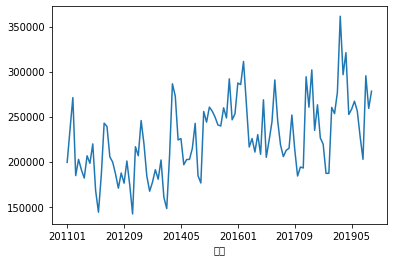

In [62]:
df_rent_b['평당보증금액','마포구'].plot()